# Projeto Final - Rec. Padrões e Redes Neurais 2022.1
##Questão 1: 5 pontos
Para os 2 datasets fornecidos a seguir modele redes neurais com base no que já aprendeu nas aulas até então. A fim de facilitar a correção,  utilizar a biblioteca Keras para modelar as redes neurais. 


#### Como será pontuado:
- 0.5 ponto: o código executa sem erros;

- 2.0 pontos: Arquiteturas das 2 RNAs estão coerentes com o problema;

- 2.0 pontos: as avaliações de desempenho nos 2 datasets foram realizadas com sucesso.

- 0.5 ponto: as discussões apresentadas estão coerentes com os resultados.




Sugestão de código para plot das curvas de treinamento:
```
model.evaluate(test_images, test_labels)
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()
```



In [ ]:
# Setup
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.utils import np_utils

#### Dataset 1 - CIFAR10 - Classificação

[Link do Dataset](https://keras.io/api/datasets/cifar10/)

Este é um conjunto de dados de 50.000 imagens coloridas, com resolução 32x32, mais um conjunto de teste de 10.000 imagens. O resultado esperado a partir do uso deste dataset, é um modelo neural que, dada uma imagem de teste recebida como entrada, consiga classificar qual é a sua categoria dentre 10 possíveis. Apresente a acurácia alcançada pelo modelo, a curva de treinamento e a matriz de confusão.  Discutir, adicionando células de texto ao notebook, os resultados obtidos.

### Laod Dataset

In [ ]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
train_images.shape

(50000, 32, 32, 3)

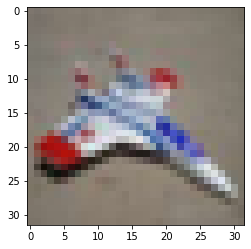

In [ ]:
img = train_images[30]
img = img.squeeze()
plt.imshow(img)
plt.show()

In [ ]:
n_classes = len(np.unique(train_labels))
train_labels = np_utils.to_categorical(train_labels, n_classes)
test_labels = np_utils.to_categorical(test_labels, n_classes)

### Convert images to graylevel 

In [ ]:
train_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
test_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

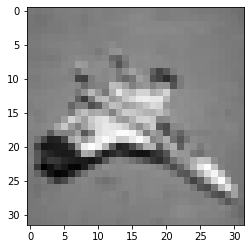

In [ ]:
img = train_images[30]
img = img.squeeze()
plt.imshow(img, cmap='gray')
plt.show()

### Downsample images

In [ ]:
train_images = np.array([cv2.resize(image, (32,32)) for image in train_images])
test_images = np.array([cv2.resize(image, (32,32)) for image in test_images])
train_images.shape, test_images.shape

((50000, 32, 32), (10000, 32, 32))

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 32, 32, 1)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 1)
train_images.shape, test_images.shape

((50000, 32, 32, 1), (10000, 32, 32, 1))

### Definição do modelo e Treinamento

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

class Classifier:
  
  def __init__(self):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.summary()
    model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    self.classifier = model

  def train_offline(self, inputs, outputs, epochs):
    history = self.classifier.fit(inputs, outputs, epochs=epochs, batch_size=10, validation_split = 0.2)
    return history

  def predict(self, inputs):
    predictions = self.classifier.predict(inputs)
    return predictions

In [ ]:
model = Classifier()
history = model.train_offline(train_images, train_labels, 10)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 batch_normalization_36 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_37 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

### Avaliação do modelo e curva de treinamento

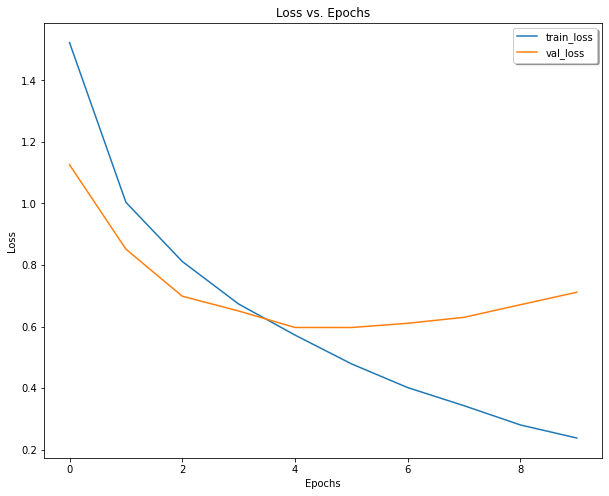

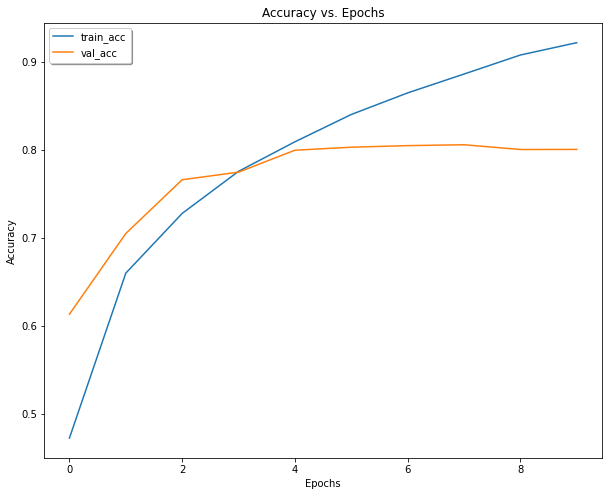

In [ ]:
def plot_training_curves(hist):

  hist = hist.history

  fig, ax = plt.subplots(figsize=(10, 8))
  ax.plot(hist['loss'], label='train_loss')
  ax.plot(hist['val_loss'], label='val_loss')
  plt.title('Loss vs. Epochs')
  legend = ax.legend(loc='best', shadow=True)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

  fig, ax = plt.subplots(figsize=(10, 8))
  ax.plot(hist['accuracy'], label='train_acc')
  ax.plot(hist['val_accuracy'],label='val_acc')
  plt.title('Accuracy vs. Epochs')
  legend = ax.legend(loc='best', shadow=True)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.show()
  
plot_training_curves(history)

In [ ]:
def transform_prediction(prediction):
  prediction = list(prediction)
  max_value = max(prediction)
  return prediction.index(max_value)

test_predictions = model.predict(test_images)
test_predictions = list(map(lambda x: transform_prediction(x), test_predictions))
test_outputs = list(map(lambda x: transform_prediction(x), test_labels))

313/313 [==============================] - 1s 4ms/step


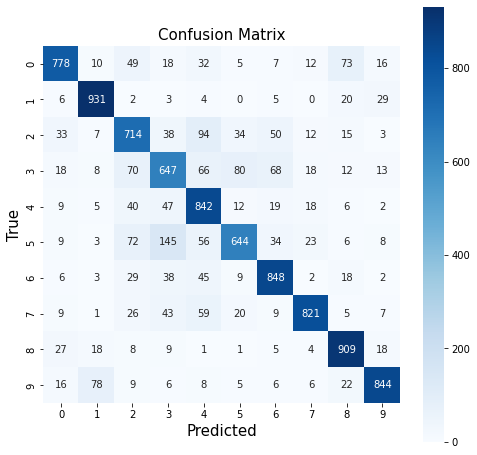

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

def show_confusion_matrix(test_predictions, test_outputs):
  fig, ax = plt.subplots(figsize=(8,8))
  cm = confusion_matrix(test_outputs, test_predictions)
  sn.heatmap(cm, square=True, ax=ax, cmap="Blues", annot=True, fmt='d') # font size
  plt.title('Confusion Matrix', fontsize = 15) # title with fontsize 20
  plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
  plt.ylabel('True', fontsize = 15)

show_confusion_matrix(test_predictions, test_outputs)

In [ ]:
import random

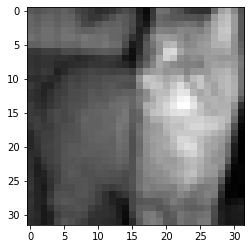

In [ ]:
images = [i for i in range(len(train_labels)) if train_labels[i][3] == 1]
i = random.choice(images)
img = train_images[i]
img = img.squeeze()
plt.imshow(img, cmap='gray')
plt.show()

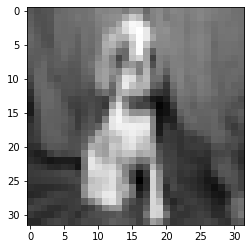

In [ ]:
images = [i for i in range(len(train_labels)) if train_labels[i][5] == 1]
i = random.choice(images)
img = train_images[i]
img = img.squeeze()
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_outputs, test_predictions))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1000
           1       0.88      0.93      0.90      1000
           2       0.70      0.71      0.71      1000
           3       0.65      0.65      0.65      1000
           4       0.70      0.84      0.76      1000
           5       0.80      0.64      0.71      1000
           6       0.81      0.85      0.83      1000
           7       0.90      0.82      0.86      1000
           8       0.84      0.91      0.87      1000
           9       0.90      0.84      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



#### Dataset2 - Boston Housing Price - Regressão

[Link do Dataset](https://keras.io/api/datasets/boston_housing/)

Carregar o conjunto de dados do Boston Housing.

Este é um conjunto de dados obtido da biblioteca StatLib mantida na Carnegie Mellon University.

As amostras contêm 13 atributos de casas em diferentes locais nos subúrbios de Boston no final dos anos 1970. Os valores esperados são os valores medianos das casas em um local (em k $).

O resultado esperado a partir do uso deste dataset, é um modelo neural que dada uma entrada com os 13 atributos consegue estimar, por meio de regressão, o valor de uma casa com tais atributos. Apresente o valor MSE (Mean Squared Error) alcançado pelo modelo e a curva de treinamento.

In [ ]:
#Load DATASET
boston_housing = keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [ ]:
class Classifier:
  
  def __init__(self):
    model = Sequential()
    model.add(Dense(16, input_shape=(13,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.summary()
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
    self.classifier = model

  def train_offline(self, inputs, outputs, epochs):
    history = self.classifier.fit(inputs, outputs, epochs=epochs, batch_size=10, validation_split = 0.2)
    return history

  def predict(self, inputs):
    predictions = self.classifier.predict(inputs)
    return predictions

In [ ]:
model = Classifier()
history = model.train_offline(x_train, y_train, 200)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                224       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 8ms/step - loss: 49.0482 - mean_squared_error: 3177.1992 - val_loss: 19.9015 - val_mean_squared_error: 615.9011
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 18.2048 - mean_squared_error: 651.3516 - val_loss: 13.4428 - val_mean_squared_e

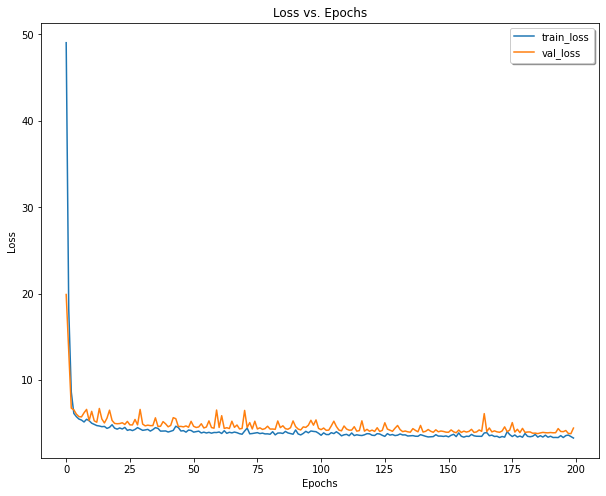

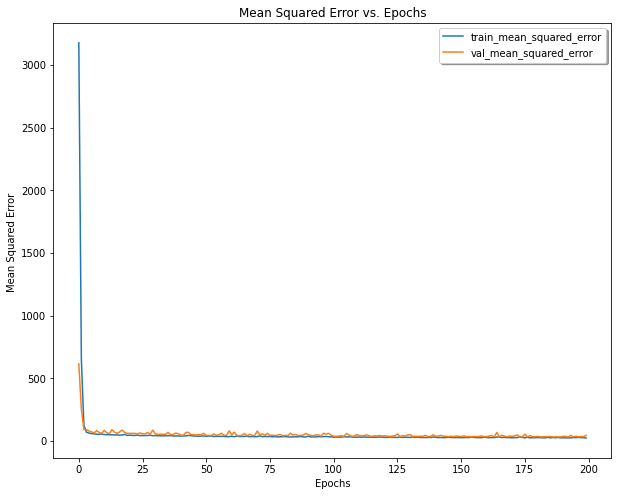

In [ ]:
def plot_training_curves(hist):

  hist = hist.history

  fig, ax = plt.subplots(figsize=(10, 8))
  ax.plot(hist['loss'], label='train_loss')
  ax.plot(hist['val_loss'], label='val_loss')
  plt.title('Loss vs. Epochs')
  legend = ax.legend(loc='best', shadow=True)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

  fig, ax = plt.subplots(figsize=(10, 8))
  ax.plot(hist['mean_squared_error'], label='train_mean_squared_error')
  ax.plot(hist['val_mean_squared_error'],label='val_mean_squared_error')
  plt.title('Mean Squared Error vs. Epochs')
  legend = ax.legend(loc='best', shadow=True)
  plt.xlabel('Epochs')
  plt.ylabel('Mean Squared Error ')
  plt.show()
  
plot_training_curves(history)

# Questão 2: 5 pontos

A escolha de hiperparâmetros é algo importante para a modelagem de redes neurais. Para essa atividade vamos utilizar uma biblioteca de otimização de hiperparâmetros chamada [Talos](https://github.com/autonomio/talos), para auxiliar na modelagem e na comparação de uma rede neural para reconhecimento de imagens utilizando o dataset [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). O dataset é formado por 60000 imagens coloridas (3 canais de cores) de dimensões 32x32 pixels, organizadas em 10 classes, com 6000 imagens por classe. São 50.000 imagens de treinamento e 10.000 imagens de teste.

Antes de iniciar a atividade, estudar a [documentação](https://autonomio.github.io/talos/#/README?id=quick-start) da biblioteca Talos e revisar seus conhecimentos sobre arquiteturas de redes neurais para reconhecimento de imagens. 

Para essa atividade, além da definição da arquitetura do modelo neural a ser usado, vocês deverão testar diferentes parêmetros usados no processo de treinamento do modelo, tais como: *learning rate*, *batch size*, *cost function*, ...

Discutir, adicionando células de texto ao notebook, os resultados obtidos.

No código abaixo, o espaço de busca desses parâmetros foi parcialmente definido. Insira opções novas onde for indicado e remova opções que não façam sentido e que podem (e estão) ocasionando erros!

### Complete o código abaixo, execute-o e gere as estatísticas e gráficos ao final. 

#### Como será pontuado:
- 0.5 ponto: o código executa sem erros;

- 1.0 ponto: Arquitetura da RNA está coerente com o problema;

- 1.0 ponto: As faixas de variação dos hiperparâmetros estão coerentes no espaço de busca;

- 2.0 pontos: O experimento solicitado com o melhor modelo foi realizado a contento (esperado!!)

- 0.5 ponto: as discussões apresentadas estão coerentes com os resultados.


### Setup
Importação das bibliotecas necessárias e carregamento do dataset

In [ ]:
try:
   import talos
except:
   !pip install talos
   import talos

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import LeakyReLU

# Libraries auxiliares
import talos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from keras.models import Sequential
from keras.layers import *

# Dataset
n_classes = 10
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_labels = np_utils.to_categorical(train_labels, n_classes)
test_labels = np_utils.to_categorical(test_labels, n_classes)

train_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
test_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

train_images = np.array([cv2.resize(image, (32,32)) for image in train_images])
test_images = np.array([cv2.resize(image, (32,32)) for image in test_images])

train_images = train_images.reshape(train_images.shape[0], 32, 32, 1)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 1)

### Espaço de Busca

##### Você deve alterar os valores dos atributos da variável *hiperparametros*, a seguir. Cada atributo recebe uma lista de valores, que serão testados durante a fase treinamento, por exemplo:  para 'batch_size': [100, 200], **poderão** ter treinamentos variando o valor do *batch_size* em 100 e 200. Já o gerenciamento dos parâmetros será realizado pela biblioteca Talos, a qual foi configurada nos códigos abaixo para avaliar apenas 10 diferentes combinações de hiperparâmetros (round_limit) no espaço de busca.

In [ ]:
hiperparametros = {
          'batch_size': [1, 10, 100], # Batch Sizes
          'epochs': [10], # DEFINA APENAS UM VALOR AQUI!
          'optimizer': ['adam', 'SGD'],# Otimizadores Diferentes
          'dropout': [0.1, 0.15,0.2], # Valor de Dropout
          'losses': ['binary_crossentropy'] , # Losses compatíveis com o problema (#DEFINA APENAS UM VALOR AQUI!)
          'l2' : [0.1] # Regularização
}

### Função de Treinamento e Scan
#### Defina o seu modelo dentro da função *f_cfar_class_model* abaixo. O único requisito é que o mesmo deve conter pelo menos uma camada de *droupot*.

In [ ]:
def f_cfar_class_model(x_train, y_train, x_val, y_val, hiperparametros):
    ##### COLOQUE O SEU MODELO AQUI #####
    model = Sequential()

    ##################################################
    model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    

    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    ##################################################
    
    model.add(Dropout(hiperparametros['dropout'])) #nao remover/alterar esta linha em específico. Ou seja, coloque o seu modelo em volta.
    ##### FIM DO MODELO #####

    # NAO ALTERAR DESTE PONTO EM DIANTE (CAMADA DA SAÍDA, COMPILAÇÃO E TREINAMENTO DO MODELO)
    model.add(Dense(10, activation='softmax',  kernel_regularizer=keras.regularizers.l2(l=hiperparametros["l2"])))
    model.compile(loss=hiperparametros['losses'],optimizer=hiperparametros['optimizer'],metrics=['acc', talos.utils.metrics.f1score])
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=hiperparametros['batch_size'], epochs=hiperparametros['epochs'], verbose=0)

    return history, model

In [ ]:
# PODE ALTERAR APENAS O LIMITANTE DA BUSCA, MAS A QUANTIDADE DE ROUNDS MÍNIMA É DE 10.
scan_object = talos.Scan(x=train_images, y=train_labels, x_val=test_images, y_val=test_labels, model=f_cfar_class_model, params=hiperparametros, experiment_name='cfar10', round_limit=5)

100%|██████████| 5/5 [1:04:51<00:00, 778.34s/it] 


### Análise de Resultados

In [ ]:
analyze_object = talos.Analyze(scan_object)
# access the dataframe with the results
analyze_object.data

,start,end,duration,round_epochs,loss,acc,f1score,val_loss,val_acc,val_f1score,batch_size,epochs,optimizer,dropout,losses,l2
0,02/07/23-131454,02/07/23-131618,83.543222,10,0.083969,0.94890,0.948375,0.136379,0.8108,0.814767,100,10,adam,0.20,binary_crossentropy,0.1
1,02/07/23-131618,02/07/23-132242,383.875754,10,0.066146,0.92342,0.924664,0.120978,0.8146,0.817146,10,10,adam,0.20,binary_crossentropy,0.1
2,02/07/23-132242,02/07/23-132353,70.705669,10,0.364163,0.41362,0.000079,0.357916,0.4164,0.000000,100,10,SGD,0.15,binary_crossentropy,0.1
3,02/07/23-132353,02/07/23-132922,328.976608,10,0.260156,0.56482,0.223733,0.247746,0.5866,0.353766,10,10,SGD,0.15,binary_crossentropy,0.1
4,02/07/23-132922,02/07/23-141946,3023.328683,10,0.325248,0.09916,0.000000,0.333112,0.0927,0.000200,1,10,SGD,0.20,binary_crossentropy,0.1


### Análise da melhor combinação de parâmetros

#### Escolha os melhores parâmetros, a partir do resultado da etapa anterior e  realize um novo treinamento sem Talos. Plotar as curvas obtidas durante o treinamento e faça uma análise de tais curvas. Faça uma análise dos resultados obtidos a partir do conjunto de teste, fornecendo uma matriz de confusão e métricas estatísticas além da acurácia. 
#### OBS: Nas análises de TODOS os resultados, é esperado que o grupo forneça as conclusẽs, por exemplo: a partir das curvas obtidas durante o treinamento é possível identificar que o modelo convergiu a partir da época X e .... 

#### A biblioteca Talos tem ferramentas para ajudar na análise do resultado da busca. O objeto analyze_object pode retornar os melhores parâmetros e a correlação dos parâmetros com determinada métrica. [Docs Analyze](https://autonomio.github.io/talos/#/Analyze?id=analyze-use)

In [ ]:
class Classifier:
  
  def __init__(self):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.summary()
    model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    self.classifier = model

  def train_offline(self, inputs, outputs, epochs):
    history = self.classifier.fit(inputs, outputs, epochs=epochs, batch_size=10, validation_split = 0.2)
    return history

  def predict(self, inputs):
    predictions = self.classifier.predict(inputs)
    return predictions

In [ ]:
model = Classifier()
history = model.train_offline(train_images, train_labels, epochs=10) 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 batch_normalization_63 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_64 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

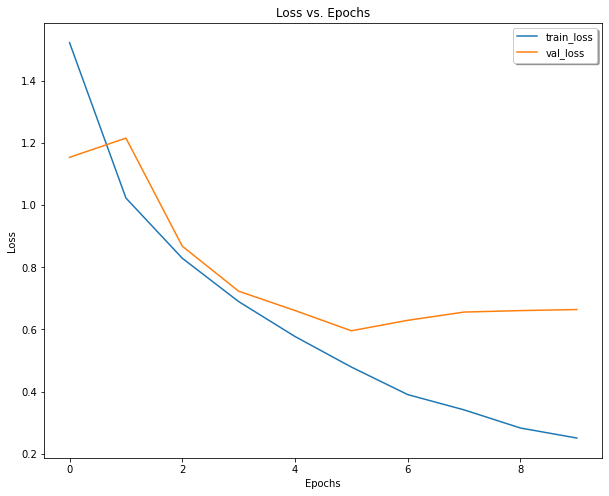

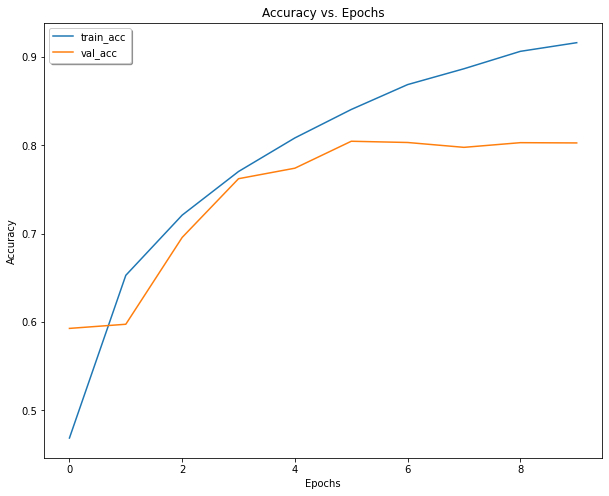

In [ ]:
def plot_training_curves(hist):

  hist = hist.history

  fig, ax = plt.subplots(figsize=(10, 8))
  ax.plot(hist['loss'], label='train_loss')
  ax.plot(hist['val_loss'], label='val_loss')
  plt.title('Loss vs. Epochs')
  legend = ax.legend(loc='best', shadow=True)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

  fig, ax = plt.subplots(figsize=(10, 8))
  ax.plot(hist['accuracy'], label='train_acc')
  ax.plot(hist['val_accuracy'],label='val_acc')
  plt.title('Accuracy vs. Epochs')
  legend = ax.legend(loc='best', shadow=True)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.show()
  
plot_training_curves(history)

In [ ]:
def transform_prediction(prediction):
  prediction = list(prediction)
  max_value = max(prediction)
  return prediction.index(max_value)

test_predictions = model.predict(test_images)
test_predictions = list(map(lambda x: transform_prediction(x), test_predictions))
test_outputs = list(map(lambda x: transform_prediction(x), test_labels))

313/313 [==============================] - 1s 3ms/step


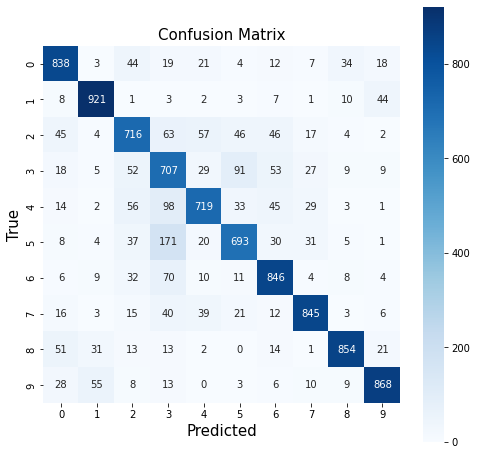

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

def show_confusion_matrix(test_predictions, test_outputs):
  fig, ax = plt.subplots(figsize=(8,8))
  cm = confusion_matrix(test_outputs, test_predictions)
  sn.heatmap(cm, square=True, ax=ax, cmap="Blues", annot=True, fmt='d') # font size
  plt.title('Confusion Matrix', fontsize = 15) # title with fontsize 20
  plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
  plt.ylabel('True', fontsize = 15)

show_confusion_matrix(test_predictions, test_outputs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_outputs, test_predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1000
           1       0.89      0.92      0.90      1000
           2       0.74      0.72      0.73      1000
           3       0.59      0.71      0.64      1000
           4       0.80      0.72      0.76      1000
           5       0.77      0.69      0.73      1000
           6       0.79      0.85      0.82      1000
           7       0.87      0.84      0.86      1000
           8       0.91      0.85      0.88      1000
           9       0.89      0.87      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000

